Unsupervised learning and dimensionality‑reduction techniques for the fraud‑detection dataset.

Techniques included:

* Principal Component Analysis (PCA)
* Multidimensional Scaling (MDS)
* Isomap
* UMAP
* t‑Distributed Stochastic Neighbor Embedding (t‑SNE)
* Isolation Forest anomaly detection

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import umap

/workspaces/fraud-detection/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_embedding(embedding: np.ndarray, labels: np.ndarray, title: str, out_path: Path) -> None:
    """
    Create and save a Seaborn scatter plot of a 2D embedding.
    """
    # Convert to a DataFrame for easier plotting with seaborn
    df_plot = pd.DataFrame({
        "Component_1": embedding[:, 0],
        "Component_2": embedding[:, 1],
        "label": labels
    })

    # map labels to readable names
    df_plot["label_name"] = df_plot["label"].map({0: "Legitimate", 1: "Fraud"})

    # Seaborn scatterplot
    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=df_plot,
        x="Component_1",
        y="Component_2",
        hue="label_name",
        palette={"Legitimate": "blue", "Fraud": "red"},
        alpha=0.5,
        s=20,
        edgecolor=None
    )

    plt.title(title)
    plt.tight_layout()

In [3]:
def sample_data(df: pd.DataFrame, sample_size: int, random_state: int = 42) -> pd.DataFrame:
    """Return a random sample of the dataframe for visualisation."""
    if sample_size <= 0 or sample_size >= len(df):
        return df.copy()
    return df.sample(n=sample_size, random_state=random_state)

In [4]:
df = pd.read_csv("../data/transactions.csv")

In [5]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,fraud_label,chargeback_label,takeover_label,anomaly_score
0,-0.237785,-0.519981,2.422684,0.091915,-0.715406,2.471737,-0.483039,-1.696235,-0.519087,-0.069684,...,-1.194239,-0.338453,-0.039767,-0.443965,-0.019366,-0.480898,0,0,0,0.085659
1,-2.408454,-0.503653,-0.016669,0.255434,-0.654982,3.577860,-0.427658,-1.569056,-2.763925,1.178534,...,-1.862889,-2.944338,-0.607335,-0.720984,-0.812725,-3.081551,1,1,1,0.140082
2,-2.869988,0.696136,-1.557528,2.442122,1.055793,0.697951,0.699312,-1.579321,-1.251082,-0.470838,...,2.178683,-4.516925,0.492453,-0.680531,0.284389,-2.227495,0,0,0,0.175243
3,2.835770,-0.204497,-0.067431,-2.057053,0.965126,0.141056,-0.752314,1.329069,3.049970,2.838967,...,1.404411,7.279591,-1.226873,0.765756,0.096722,1.840350,1,1,1,0.301131
4,-1.395161,-0.023080,-2.413180,-2.772603,-1.882698,7.314835,0.470381,1.750904,1.219031,1.425864,...,-1.174354,2.558189,-1.381175,-0.449436,-0.894596,-2.118373,1,1,1,0.286990


In [6]:
sample_df = sample_data(df, sample_size=500, random_state=42)

In [7]:
X= sample_df.drop(columns=['fraud_label', 'chargeback_label', 'takeover_label', 'anomaly_score'])
y= sample_df['fraud_label']

In [8]:
# z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Plots go in the plots directory
plots_dir = Path("../plots")

Saved PCA plot


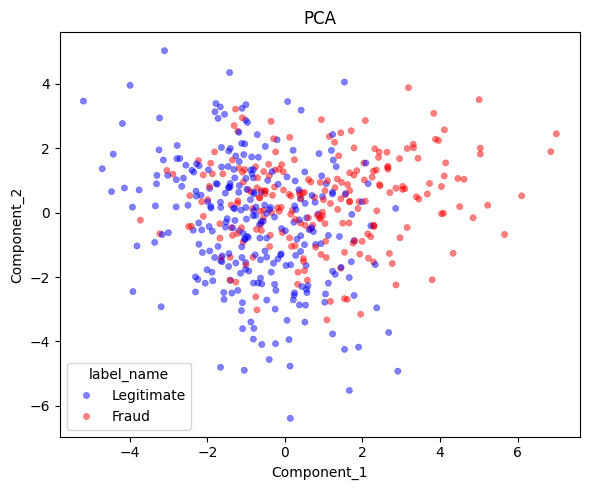

In [10]:
# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plot_embedding(X_pca, y, "PCA", plots_dir / "pca.png")
print("Saved PCA plot")

/workspaces/fraud-detection/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Saved MDS plot


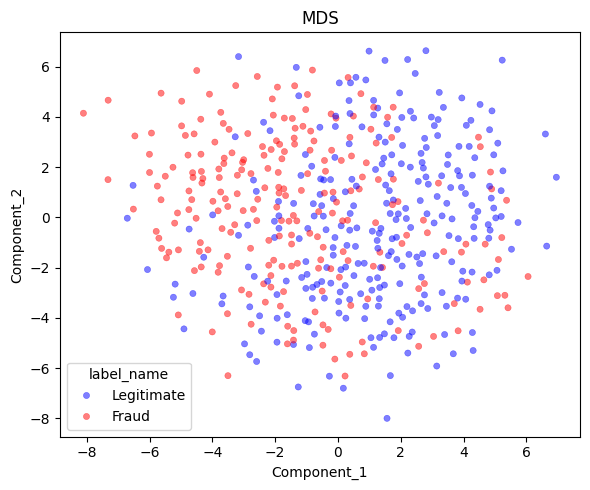

In [11]:
# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)
plot_embedding(X_mds, y, "MDS", plots_dir / "mds.png")
print("Saved MDS plot")

Saved Isomap plot


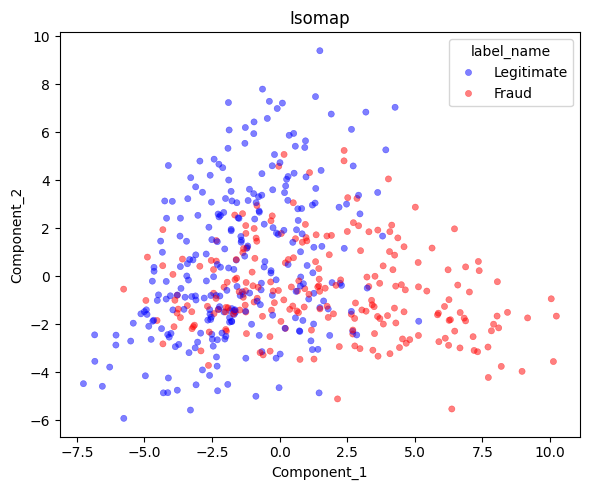

In [12]:
# Isomap
iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X_scaled)
plot_embedding(X_iso, y, "Isomap", plots_dir / "isomap.png")
print("Saved Isomap plot")

/workspaces/fraud-detection/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Saved UMAP plot


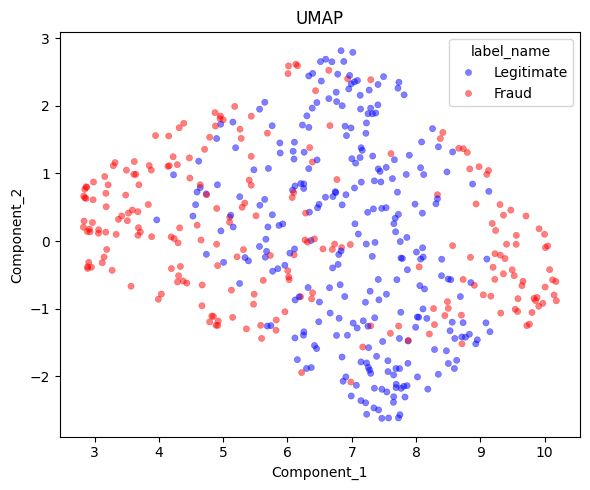

In [13]:
# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
plot_embedding(X_umap, y, "UMAP", plots_dir / "umap.png")
print("Saved UMAP plot")

Saved t-SNE plot


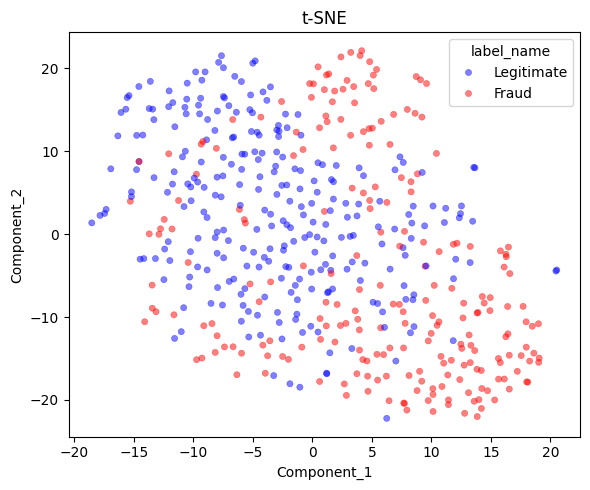

In [14]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
plot_embedding(X_tsne, y, "t-SNE", plots_dir / "tsne.png")
print("Saved t-SNE plot")

In [15]:
# Isolation Forest anomaly score scatter (colour points by anomaly level)
iso_forest = IsolationForest(contamination=0.1, random_state=42)
scores = -iso_forest.fit_predict(X_scaled)
# Normalise scores to [0, 1]
score_norm = (scores - scores.min()) / (scores.max() - scores.min())



fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=score_norm, s=10)
ax.set_title("Isolation Forest Anomaly Scores (PCA axes)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
fig.colorbar(scatter, ax=ax, label="Anomaly Score")
fig.tight_layout()
out_path = plots_dir / "isolation_forest.png"
out_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_path)
plt.close(fig)
print("Saved Isolation Forest anomaly score plot")

Saved Isolation Forest anomaly score plot


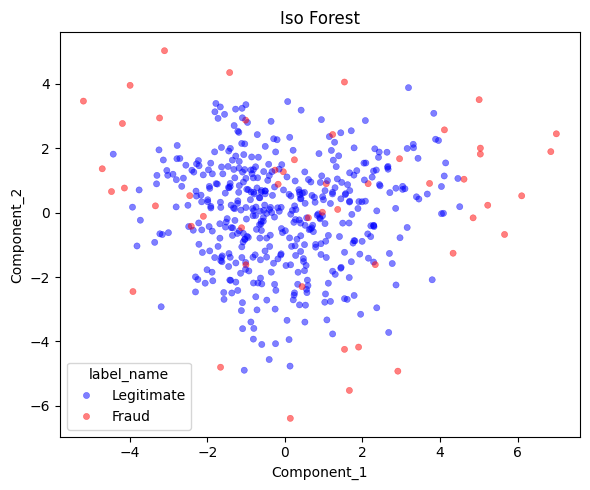

In [21]:
plot_embedding(X_pca, score_norm, "Iso Forest", plots_dir / "iso_forest.png")